# UNSUPERVISED LEARNING

# K Means clustering

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")


In [4]:
X, y_true = make_blobs(n_samples=500, centers=3, cluster_std=0.60, random_state=42)

In [6]:
df = pd.DataFrame(X, columns = ["Feature_1", "Feature_2"])
df

,Feature_1,Feature_2
0,-6.190063,-7.302015
1,3.021747,1.940593
2,5.953761,1.488191
3,-2.744463,8.136177
4,5.360607,1.728324
...,...,...
495,-6.040014,-6.325329
496,-2.555459,9.218977
497,4.438408,2.974583
498,-7.193261,-6.250704


In [8]:
scaler = StandardScaler()
X_scale = scaler.fit_transform(df)

In [18]:
inertia = []
K_range = range(1, 11)

In [19]:
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scale)
    inertia.append(kmeans.inertia_)


In [20]:
inertia

[1000.0000000000002,
 297.8954141051722,
 11.57548472310498,
 9.75206797735684,
 8.257175272446283,
 6.917577320416799,
 6.334755391595288,
 5.70417717790143,
 5.060234133532077,
 4.762361898130397]

# Elbow curve

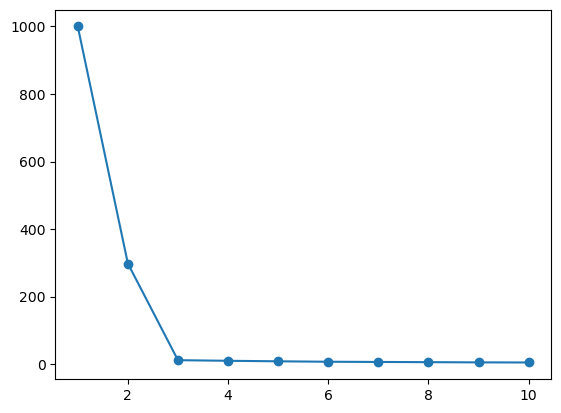

In [21]:
plt.plot(K_range, inertia, marker="o")

In [22]:
kmeans_final = KMeans(n_clusters=3, random_state=42)


In [24]:
cluster_labels = kmeans_final.fit_predict(X_scale)
cluster_labels

array([1, 0, 0, 2, 0, 0, 1, 0, 0, 1, 0, 2, 2, 2, 0, 0, 2, 1, 1, 2, 0, 2,
       0, 1, 1, 0, 0, 1, 1, 2, 0, 2, 2, 2, 0, 0, 0, 0, 1, 1, 0, 2, 2, 2,
       2, 0, 0, 0, 0, 1, 1, 2, 1, 1, 0, 2, 2, 1, 0, 1, 1, 2, 0, 1, 0, 1,
       0, 1, 2, 0, 0, 0, 0, 1, 2, 1, 2, 0, 2, 2, 1, 2, 0, 2, 1, 1, 1, 1,
       0, 2, 1, 0, 2, 0, 0, 1, 2, 2, 2, 1, 0, 2, 2, 1, 1, 2, 2, 1, 2, 1,
       1, 1, 1, 1, 1, 0, 2, 1, 0, 1, 2, 2, 0, 0, 1, 0, 2, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 2, 1, 1, 0, 0, 1, 1, 1, 2, 2, 2, 0, 1, 0, 0,
       2, 1, 2, 1, 0, 0, 1, 1, 2, 2, 1, 2, 2, 0, 1, 1, 1, 2, 2, 1, 1, 2,
       2, 0, 0, 0, 2, 1, 2, 2, 1, 1, 2, 0, 2, 1, 1, 1, 1, 1, 2, 0, 2, 2,
       1, 0, 2, 2, 1, 1, 0, 1, 0, 2, 2, 1, 1, 0, 1, 2, 2, 1, 2, 1, 2, 0,
       0, 2, 1, 2, 0, 2, 2, 1, 0, 0, 0, 0, 2, 1, 1, 1, 2, 0, 2, 0, 0, 0,
       2, 2, 1, 1, 0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 1, 2, 1, 2, 2, 2, 1, 2,
       0, 0, 0, 2, 0, 0, 2, 2, 0, 1, 2, 2, 2, 2, 1, 1, 2, 0, 2, 2, 1, 2,
       0, 1, 0, 0, 1, 2, 2, 2, 1, 2, 1, 0, 0, 2, 0,

In [25]:
df["cluster"] = cluster_labels

<Axes: xlabel='Feature_1', ylabel='Feature_2'>

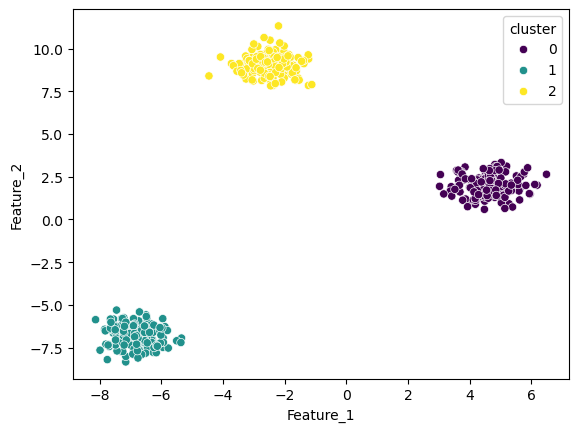

In [26]:
sns.scatterplot(x=df['Feature_1'],
                y=df['Feature_2'],
                hue=df['cluster'],
                palette='viridis')


# DB Scan

In [28]:
from sklearn.datasets import make_moons


In [29]:
X, y_true = make_moons(n_samples=500, noise=0.05, random_state=42)


In [33]:
from sklearn.cluster import KMeans, DBSCAN

In [34]:
df = pd.DataFrame(X, columns = ["Feature_1", "Feature_2"])
df

,Feature_1,Feature_2
0,0.830586,-0.447733
1,0.701678,0.816918
2,1.022080,-0.492571
3,-0.316765,0.953438
4,0.293226,1.057185
...,...,...
495,0.239754,0.985462
496,0.072145,0.184834
497,0.590273,-0.365577
498,1.619465,-0.283658


In [35]:
scaler = StandardScaler()
X_scale = scaler.fit_transform(df)

In [38]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scale)


In [40]:
df["kmeans_cluster"] = kmeans_labels

<Axes: xlabel='Feature_1', ylabel='Feature_2'>

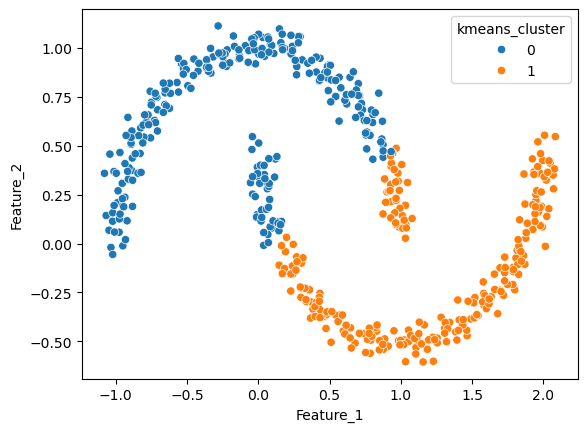

In [41]:
sns.scatterplot(x=df['Feature_1'], y=df['Feature_2'], hue=df['kmeans_cluster'], palette='tab10')


In [43]:
#DB Scan
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scale)


In [44]:
df["dbscan_cluster"] = dbscan_labels

<Axes: xlabel='Feature_1', ylabel='Feature_2'>

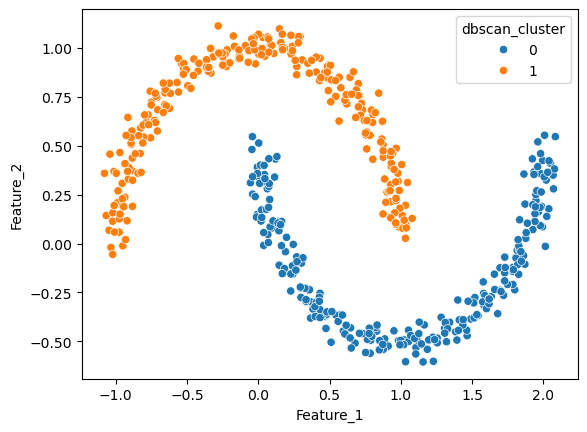

In [45]:
sns.scatterplot(x=df['Feature_1'], y=df['Feature_2'], hue=df['dbscan_cluster'], palette='tab10')


# PCA

In [46]:
from sklearn.decomposition import PCA

In [47]:
X, y = make_blobs(n_samples=500, n_features=5, centers=3, cluster_std=1.5, random_state=42)


In [52]:
scaler = StandardScaler()
X_scale = scaler.fit_transform(X)
X_scale

array([[-1.07039133,  0.74546814,  0.0859273 , -1.58466105, -0.90798501],
       [-0.52251206,  0.61451192,  0.08731966, -0.95761934, -0.68801347],
       [ 0.78222538,  0.4223533 , -1.04593191,  0.20984645, -0.76407462],
       ...,
       [ 0.14922774, -1.22161917,  0.65212732,  0.82409945,  1.98001159],
       [ 1.16073493,  0.7636525 , -0.01629411,  0.39814317, -0.84828797],
       [-0.70166364, -1.61902103,  1.11350971,  1.38647649,  1.30212699]],
      shape=(500, 5))

In [53]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scale)


In [55]:
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['label'] = y


<Axes: xlabel='PC1', ylabel='PC2'>

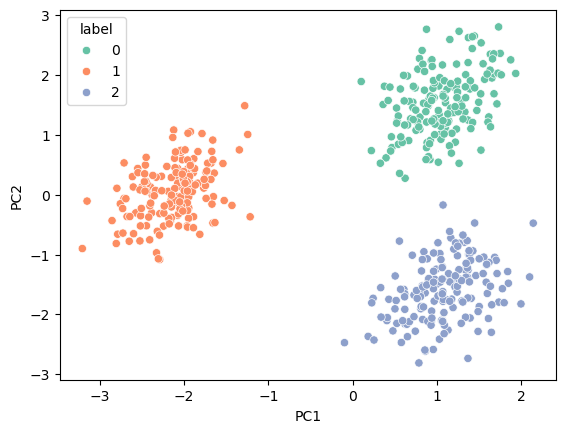

In [56]:
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='label', palette='Set2')
